In [ ]:
#We implement Black-Scholes model, run 10000 Wiener processes and check the times there's a gain if the option is exercised

##1.Black-Scholes Model Implementation

In [ ]:
#Results can be checked in http://www.option-price.com/

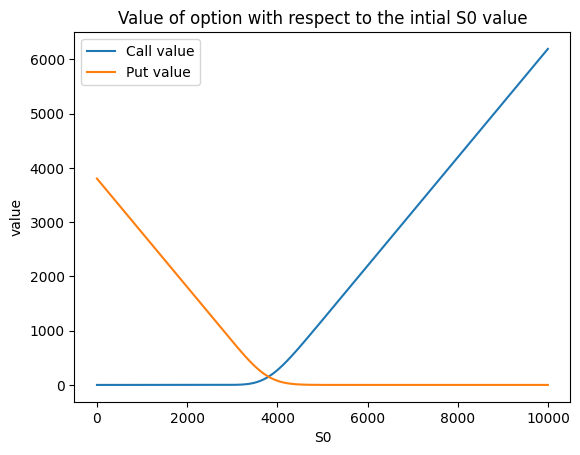

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def Black(S0,K,r,sigma,T,name):
  d1=(np.log(S0/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
  d2= d1- sigma*np.sqrt(T)
  if name=="call":
    c=S0*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
    return c

  elif name=="put":
    p=K*np.exp(-r*T)*norm.cdf(-d2)-S0*norm.cdf(-d1)
    return p

S0 = 5000.0
dt = 0.001
T = 1
r=0.05
sigma = 0.1
name = "call"
K=4000

s = np.arange(1,10000,1)
calls = Black(s,K,r,sigma,T,"call")
puts = Black(s,K,r,sigma,T,"put")
plt.plot(calls, label="Call value")
plt.plot(puts, label="Put value")
plt.title("Value of option with respect to the intial S0 value")
plt.xlabel("S0")
plt.ylabel("value")
plt.legend()

In [ ]:
S0 = 20.0
dt = 0.001
T = 1
r=0.1
sigma = 0.1
name = "call"
K=18
call=Black(S0,K,r,sigma,T,name)
print(call)

3.726171705984285


##Monte Carlo Simulation for Options

Option call value is 1079.205306772979
 Process 0 after 1 year/s is 5319.742385552884 with a delivery price of 4000 and a value option of 1079.205306772979 we will have 240.5370787799052, then the gain is 240.5370787799052
 Process 1 after 1 year/s is 5495.376372164745 with a delivery price of 4000 and a value option of 1079.205306772979 we will have 416.17106539176575, then the gain is 416.17106539176575
 Process 2 after 1 year/s is 4291.982339507457 with a delivery price of 4000 and a value option of 1079.205306772979 we will have -787.2229672655217, then the gain is 0
 Process 3 after 1 year/s is 4857.855439948343 with a delivery price of 4000 and a value option of 1079.205306772979 we will have -221.34986682463614, then the gain is 0
 Process 4 after 1 year/s is 6258.395079191428 with a delivery price of 4000 and a value option of 1079.205306772979 we will have 1179.1897724184487, then the gain is 1179.1897724184487


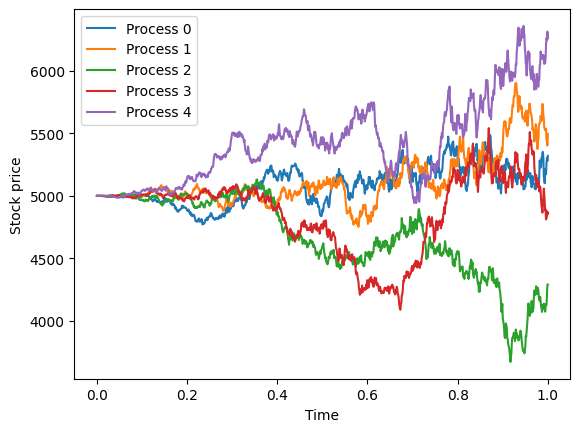

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
np.random.seed(4)

def a(t):
    return t

def b(t):
    return t

def simulate_stochastic_process_and_integral(S0, T, dt, a, b, sigma):
    """
    Escojo sigma para ver la volatilidad del proceso
    """
    N = int(T/dt)
    t = np.linspace(0, T, N+1)
    Xt = np.zeros(N+1)
    Xt[0] = S0

    dW = np.random.normal(0, sigma, N)

    for i in range(1, N+1):
      dXt = a(t[i-1]) * Xt[i-1] * dt + b(t[i-1]) * Xt[i-1] * dW[i-1]
      Xt[i] = Xt[i-1] + np.random.choice([dXt,-dXt])

    return t, Xt
S0 = 5000.0
dt = 0.001
T = 1
r=0.02
sigma = 0.01
name = "call"
K=4000

B=Black(S0,K,r,sigma,T,name)
print(f"Option call value is {B}")
for i in range(5):
  t, Xt = simulate_stochastic_process_and_integral(S0, T, dt, a, b, sigma)
  B=Black(S0,K,r,sigma,T,name)
  print(f" Process {i} after {T} year/s is {Xt[-1]} with a delivery price of {K} and a value option of {B} we will have {Xt[-1]-K-B}, then the gain is {max(0,Xt[-1]-K-B)}")
  plt.plot(t, Xt, label=f"Process {i}")

plt.xlabel("Time")
plt.ylabel("Stock price")
plt.legend()
plt.show()



In [ ]:
#Since the function below takes some time to compute with a lot of stochastic processes, I modified the function simulate_stochastic_process_and_integral and now it works much more efficiently
#It takes like 40 seconds to compute because we are trying to plot 10000 processes

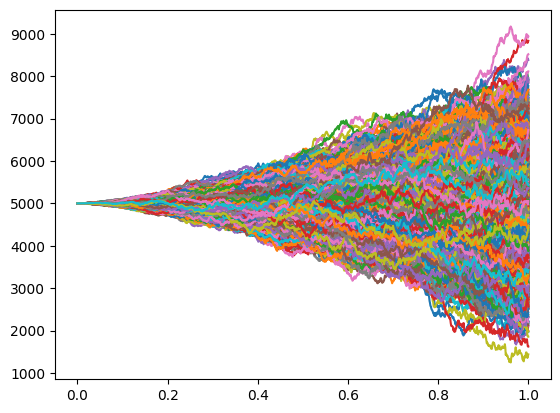

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
np.random.seed(4)
# Las funciones options_MC, a y b siguen igual...

def simulate_stochastic_process_and_integral(S0, T, dt, a, b, sigma):
    N = int(T/dt)
    t = np.linspace(0, T, N+1)

    dW = np.random.normal(0, sigma, N)
    dXt = a(t[:-1]) * S0 * dt + b(t[:-1]) * S0 * dW
    choices = np.random.choice([-1, 1], size=N)
    dXt *= choices

    Xt = np.cumsum(np.insert(dXt, 0, 0)) + S0

    return t, Xt

S0 = 5000.0
dt = 0.001
T = 1
r = 0.02
sigma = 0.01
name = "call"
K = 4000

for i in range(10000):
    t, Xt = simulate_stochastic_process_and_integral(S0, T, dt, a, b, sigma)
    plt.plot(t,Xt)


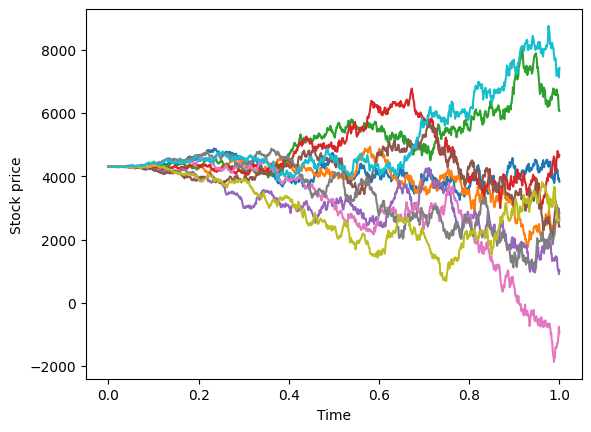

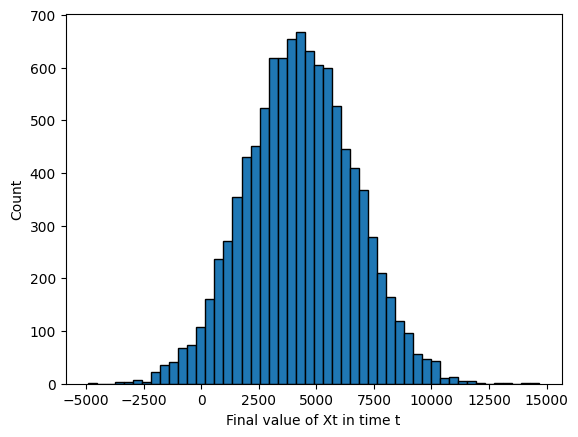

The price of the option plus a margin and the strike price is: 4000 + 479.2410278344055 = 4479.241027834405


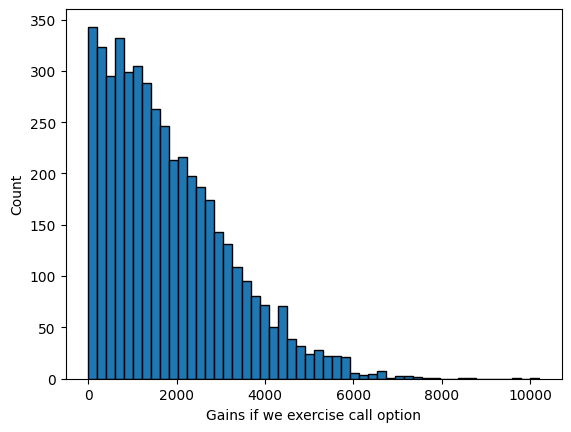

Gain a 46.6 % of the times and the rest lose 479.2410278344055 $


In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
np.random.seed(4)

def simulate_stochastic_process_and_integral(S0, T, dt, a, b, sigma):
    N = int(T/dt)
    t = np.linspace(0, T, N+1)

    dW = np.random.normal(0, sigma, N)
    dXt = a(t[:-1]) * S0 * dt + b(t[:-1]) * S0 * dW
    choices = np.random.choice([-1, 1], size=N)
    dXt *= choices

    Xt = np.cumsum(np.insert(dXt, 0, 0)) + S0

    return t, Xt

S0 = 4300
dt = 0.001
T = 1
r = 0.02
sigma = 0.03
name = "call"
K = 4000

processes = []
final_values_Xt = []
for i in range(10000):
    t, Xt = simulate_stochastic_process_and_integral(S0, T, dt, a, b, sigma)
    processes.append(Xt)
    final_values_Xt.append(Xt[-1])
for i in range(10):
  plt.plot(t,processes[i])
plt.xlabel("Time")
plt.ylabel("Stock price")
plt.show()

margin = 100 #Additional amount we want to add to the price of the option
B = Black(S0,K,r,sigma,T,name)+margin
dif = []


for i in range(len(final_values_Xt)):
  gain = final_values_Xt[i]-K-B
  if gain>0:
    dif.append(gain) #Modify 0 if we want to put a margin when pricing the option

plt.hist(final_values_Xt, bins=50, edgecolor='black')
plt.xlabel("Final value of Xt in time t")
plt.ylabel("Count")
plt.show()

print(f"The price of the option plus a margin and the strike price is: {K} + {B} = {K+B}")

plt.hist(dif, bins=50, edgecolor='black')
plt.xlabel("Gains if we exercise call option")
plt.ylabel("Count")
plt.show()

N_dif = len(dif)
N_final = len(final_values_Xt)
print(f"Gain a {N_dif/N_final*100} % of the times and the rest lose {B} $")